### <a href="#End">[Go To End]</a>
###### .

# <a href="https://www.amazon.in/Fire-TV-Stick-Alexa-Voice-Remote-3rd-Gen/dp/B08R6QR863/"> <span style='background :orange' > Amazon Fire TV Stick <span/> </a>

# <span style='background :yellow' > Dependencies <span/>

In [ ]:
# for preprocessing
from textblob import TextBlob
from string import punctuation
from bs4 import BeautifulSoup

# Text Preprocessing Modules
import re
import sys
import requests
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

# Data Analysis and wrangling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.vis_utils import plot_model

#other librariess
import warnings
warnings.filterwarnings('ignore')
import csv

# for word cloud
from wordcloud import WordCloud

# Train Test Split
from sklearn.model_selection import train_test_split, GridSearchCV


# Machine Learinig Libraries
from sklearn.model_selection import KFold
from sklearn import tree
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from collections import Counter
from scipy.sparse import hstack

#keras Libraries 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# Performance Measure
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Test Featurization Modules
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer

### `importing data thata we have Scraped from E-commerce website like Amazon `

In [ ]:
df=pd.read_csv("reviews.csv")
df

,Review
0,"During Prime day sale, 3rd Gen Stick supposed ..."
1,"Received a defective piece,which would not con..."
2,"Order on 4th april, deliveey was expecting 24t..."
3,Used for 30 daysRemote response time seem to ...
4,I bought it today.Power and volume control of ...
...,...
3885,"बढ़िया है, volume up down काम नहीं कर रही, शाय..."
3886,Everything is met expectations
3887,Amazing product from Amazon .. built quality i...
3888,It gives very smooth and fast response. All fe...


## `Summary of dataset`

In [ ]:
df.rename(columns={'Review':'Reviews'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3890 entries, 0 to 3889
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  3840 non-null   object
dtypes: object(1)
memory usage: 30.5+ KB


## `Dropping Duplicates & lenth of dataset`

In [ ]:
#convering into string
df['Reviews'] = df['Reviews'].astype(str)
#drop duplicates 
df = df.drop_duplicates()
#length of data after dropping duplicates
print("Shape of dataframe after dropping duplicates:",df.shape)

Shape of dataframe after dropping duplicates: (3467, 1)


## <span style='background :yellow' > Text Preprocessing  </span> 

In [ ]:
import nltk
nltk.download('punkt')
  #Remove Urls and HTML links
def remove_urls(Reviews):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', Reviews)
df['Reviews']=df['Reviews'].apply(lambda x:remove_urls(x))
def remove_html(Reviews):
    html=re.compile(r'<.*?>')
    return html.sub(r'',Reviews)
df['Reviews']=df['Reviews'].apply(lambda x:remove_html(x))
#_______________________________________________________________

# Lower casing
def lower(Reviews):
    low_text= Reviews.lower()
    return low_text
df['Reviews']=df['Reviews'].apply(lambda x:lower(x))
#_______________________________________________________________

# Number removal
def remove_num(Reviews):
    remove= re.sub(r'\d+', '', Reviews)
    return remove
df['Reviews']=df['Reviews'].apply(lambda x:remove_num(x))
#_______________________________________________________________
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#Remove stopwords & Punctuations
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
def punct_remove(Reviews):
    punct = re.sub(r"[^\w\s\d]","", Reviews)
    return punct
df['Reviews']=df['Reviews'].apply(lambda x:punct_remove(x))
def remove_stopwords(Reviews):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(Reviews).split() if word not in STOPWORDS])
df['Reviews']=df['Reviews'].apply(lambda x:remove_stopwords(x))
#_______________________________________________________________

#Remove mentions and hashtags
def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text
df['Reviews']=df['Reviews'].apply(lambda x:remove_mention(x))
def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text
df['Reviews']=df['Reviews'].apply(lambda x:remove_hash(x))
#_______________________________________________________________
#Remove extra white space left while removing stuff
def remove_space(Reviews):
    space_remove = re.sub(r"\s+"," ",Reviews).strip()
    return space_remove
df['Reviews']=df['Reviews'].apply(lambda x:remove_space(x))
#_______________________________________________________________
df['Reviews'] = df['Reviews'].str.replace('The media could not be loaded.','')
#_______________________________________________________________
def clean_text(Reviews):
   
    Reviews = str(Reviews).lower() # convert to lowercase
    Reviews = re.sub('\[.*?\]', '', Reviews) 
    Reviews = re.sub('https?://\S+|www\.\S+', '', Reviews) # Remove URls
    Reviews = re.sub('<.*?>+', '', Reviews)
    Reviews = re.sub(r'[^a-z0-9\s]', '', Reviews) # Remove punctuation
    Reviews = re.sub('\n', '', Reviews)
    Reviews = re.sub('ok', '', Reviews)
    Reviews = re.sub('\w*\d\w*', '', Reviews)
    return Reviews
df['Reviews'] = df['Reviews'].apply(clean_text)
tokens = df['Reviews'].apply(word_tokenize)
df['Reviews'].replace('', np.nan, inplace=True)
df=df.dropna(subset=['Reviews'])
df = df.set_index('Reviews')
df.reset_index(inplace=True)
df['Reviews'] = df['Reviews'].astype(str)
df.style

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Reviews
0,prime day sale rd gen stick supposed come sony liv zee voot subscription shown boing item working please needful
1,received defective piecewhich would connect wifi even brief connection happensfailing againhave checked different networks tried alternate hdmi portsbut problem persisted
2,order th april deliveey expecting th april received st may open packet item missing irresponsible service
3,used daysremote response time seem increasingv amazon basics cells died weeksnew batteries gone week draining battery remote shows low battery everytime refuses respond stops working intermittentlycustomer care guys one solution reatart fire tv reboot reset remote workseems hardware issue need replacement
4,bought todaypower volume control firestick remote workingi called customer care one half hour trying different trouble shooting methods told tv compatibleif case need try methods right kind lcd tv compatible mentioned product informationi would bought lesser priced nd generation model casevery disappointingamazon needs lo
5,media could loaded months purchase stopped workingfiretv stuck logotried every solution available internetthen talked customer service saying warranty cant replace directly buy giving bought rps delivery refund scam expect kind things amazon warranty product cant replace purchaae waste extraa k money
6,device connected wifi detect internet works amazingly challenge faced getting started first connected hour ordeal device connected wifi saying internet reset wire stick multiple time work factory reset time finally internet error disappeared device worked fine monthafter wifi connected internet issue started factory reset issue still persist time posting review issue fixed hope get fixed
7,mi tv box k still better deal compared older always faster firesticks terms ui navigationthis firestick bad supposed new menu system major streaming services work always feel slight lag user interface amazon bloats home page many options wish could turn thr suggestions would speed ui want see apps home screen suggestions slowing ui time overflowing home page junk suggestions
8,bought product since yesterday started creating problem connect tv tv simply restart called sony tv technician checked said tv fine firestick faulty creating thia problem kindly refund amount take back faulty product
9,issue detail forum toowifi connection successful fails connect amazoncomand hence fire tv update failstried plugin power cord fire stick router etc nothing workedtried factory reset back key right side navigation circle factory reset occurnote wifi connection good lg tv working fine prime video working finethis first time trying fire stick lg tvif response customer care return product


In [ ]:
size=df.Reviews.values
print("Size of Reviews:",size.shape)
len_=[len(word) for word in size]
print("Mean length of Reviews:",np.mean(len_))

Size of Reviews: (3448,)
Mean length of Reviews: 89.05452436194895


# Number of unique lengths of Reviews

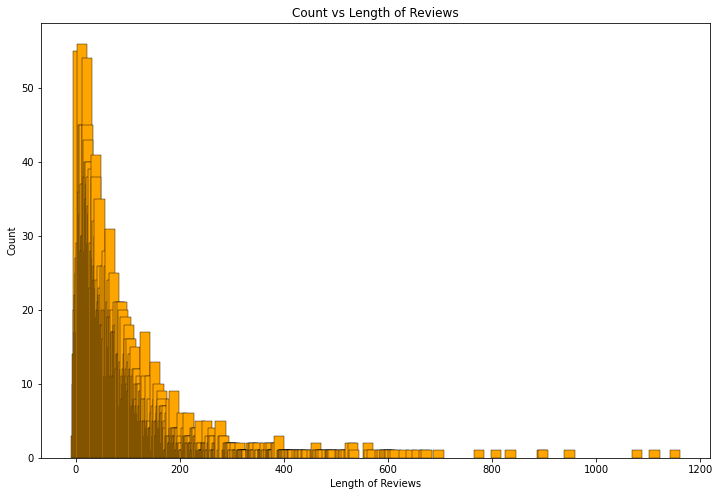

In [ ]:
ulen=list(set(len_))

plt.figure(figsize=(12,8))
plt.bar(ulen, [len_.count(x) for x in ulen], width=20, color='orange', linewidth=0.4, edgecolor='black')
plt.xlabel('Length of Reviews')
plt.ylabel('Count')
plt.title('Count vs Length of Reviews')
plt.show()

In [ ]:
df.describe(include = 'all')

,Reviews
count,3448
unique,3284
top,good
freq,21


# Most Frequent Words:

In [ ]:
cnt = Counter()
for text in df["Reviews"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['Word', 'Count']
temp

,Word,Count
0,tv,1598
1,product,989
2,good,893
3,stick,746
4,remote,691
5,fire,652
6,working,638
7,quality,583
8,amazon,557
9,smart,461


## `Adding Subjectivity & Polarity to reviews`

In [ ]:
df['text_length']=df['Reviews'].str.split().map(lambda x: len(x))
df[['Reviews','text_length']]

def calc_subj(Text):
    return TextBlob(Text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(Text):
    return TextBlob(Text).sentiment.polarity
 
df['Subjectivity'] = df.Reviews.apply(calc_subj)
df['Polarity'] = df.Reviews.apply(calc_pola)
1
2
df.head(4).style.background_gradient(cmap='plasma')

,Reviews,text_length,Subjectivity,Polarity
0,prime day sale rd gen stick supposed come sony liv zee voot subscription shown boing item working please needful,19,0.000000,0.000000
1,received defective piecewhich would connect wifi even brief connection happensfailing againhave checked different networks tried alternate hdmi portsbut problem persisted,20,0.311111,0.000000
2,order th april deliveey expecting th april received st may open packet item missing irresponsible service,16,0.275000,-0.100000
3,used daysremote response time seem increasingv amazon basics cells died weeksnew batteries gone week draining battery remote shows low battery everytime refuses respond stops working intermittentlycustomer care guys one solution reatart fire tv reboot reset remote workseems hardware issue need replacement,41,0.233333,-0.066667


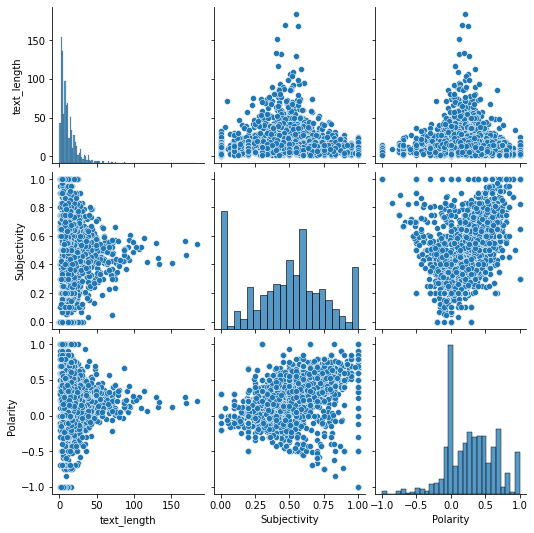

In [ ]:
sns.pairplot(df)
plt.show()

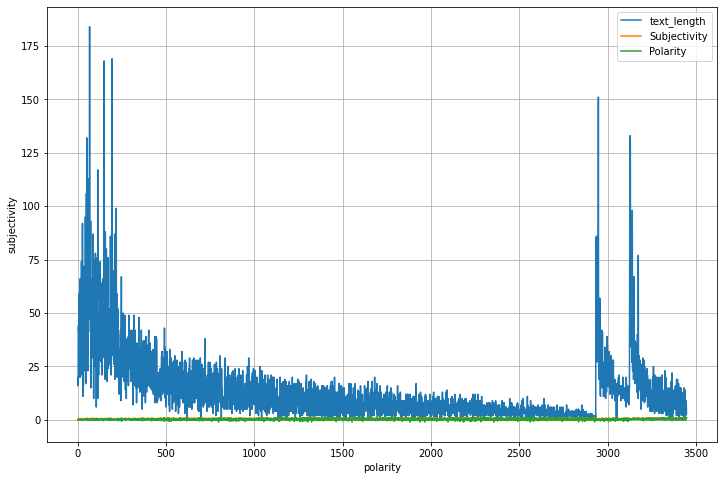

In [ ]:
df.plot(figsize=(12,8),grid=True)
plt.ylabel('subjectivity')
plt.xlabel('polarity')
plt.show()

In [ ]:
import nltk
nltk.download('vader_lexicon')

reviews = df["Reviews"]
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

sample = df['Reviews'][4]
print("Review:\n",sample)
print('_'*16)
print('SENTIMENT:',sentiment_value(sample))
print('_'*16)

Review:
 bought todaypower volume control firestick remote workingi called customer care one half hour trying different trouble shooting methods told tv compatibleif case need try methods right kind lcd tv compatible mentioned product informationi would bought lesser priced nd generation model casevery disappointingamazon needs lo
________________
SENTIMENT: 0.6
________________


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Text(0, 0.5, 'Subjectivity')

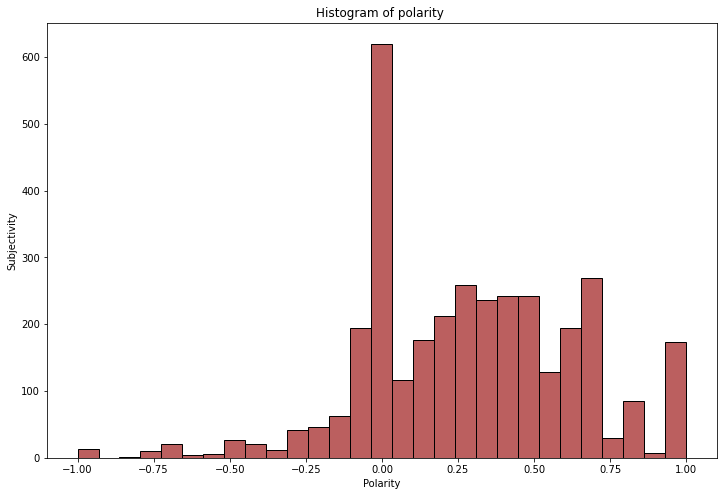

In [ ]:
plt.figure(figsize = (12, 8))
sns.histplot(data=df, x="Polarity", color='brown')
plt.title('Histogram of polarity ')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

Text(0, 0.5, 'Polarity')

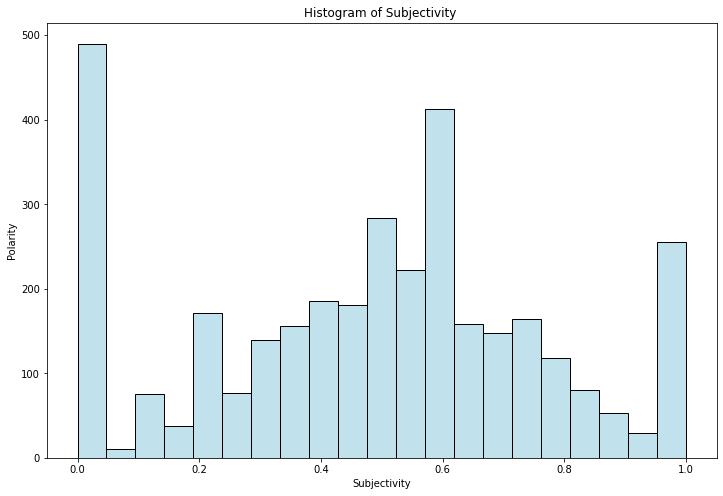

In [ ]:
plt.figure(figsize = (12, 8))
sns.histplot(data=df, x="Subjectivity", color='lightblue')
plt.title('Histogram of Subjectivity ')
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')

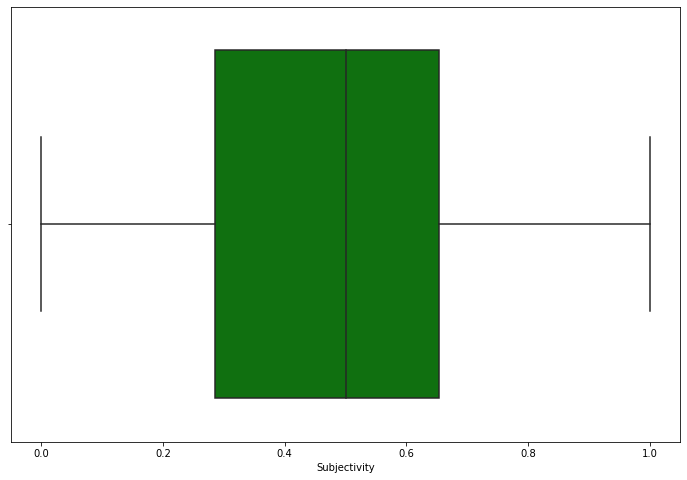

In [ ]:
plt.figure(figsize = (12, 8))
ax = sns.boxplot(df['Subjectivity'],color='green')

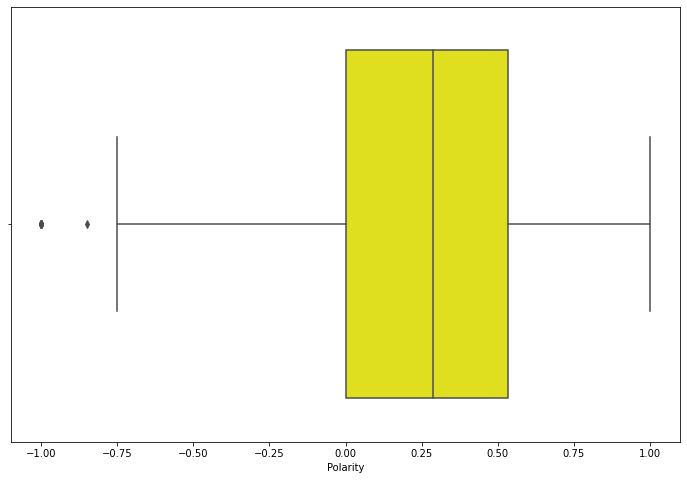

In [ ]:
plt.figure(figsize = (12, 8))
ax = sns.boxplot(df['Polarity'],color='yellow')

Text(0.5, 1.0, 'subjectivity vs polarity')

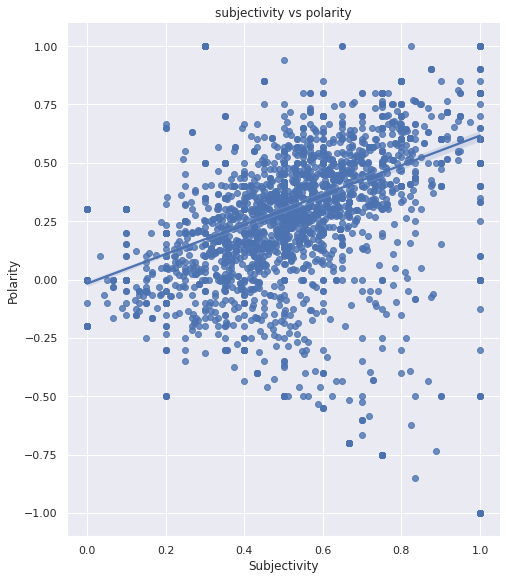

In [ ]:
sns.set_theme(color_codes=True)
g = sns.lmplot(x="Subjectivity", y="Polarity", data=df,palette="tab10",height=8, aspect=.9)
plt.title('subjectivity vs polarity')

## `Sentiment Analysis for all Reviews`

In [ ]:
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Neutral'
    else:
        result = 'Negative'
    return result
 
df['Sentiment'] = df.Polarity.apply(sentiment)
1
df.head(6).style.background_gradient(cmap='icefire')

,Reviews,text_length,Subjectivity,Polarity,Sentiment
0,prime day sale rd gen stick supposed come sony liv zee voot subscription shown boing item working please needful,19,0.000000,0.000000,Neutral
1,received defective piecewhich would connect wifi even brief connection happensfailing againhave checked different networks tried alternate hdmi portsbut problem persisted,20,0.311111,0.000000,Neutral
2,order th april deliveey expecting th april received st may open packet item missing irresponsible service,16,0.275000,-0.100000,Negative
3,used daysremote response time seem increasingv amazon basics cells died weeksnew batteries gone week draining battery remote shows low battery everytime refuses respond stops working intermittentlycustomer care guys one solution reatart fire tv reboot reset remote workseems hardware issue need replacement,41,0.233333,-0.066667,Negative
4,bought todaypower volume control firestick remote workingi called customer care one half hour trying different trouble shooting methods told tv compatibleif case need try methods right kind lcd tv compatible mentioned product informationi would bought lesser priced nd generation model casevery disappointingamazon needs lo,44,0.443197,0.059864,Positive
5,media could loaded months purchase stopped workingfiretv stuck logotried every solution available internetthen talked customer service saying warranty cant replace directly buy giving bought rps delivery refund scam expect kind things amazon warranty product cant replace purchaae waste extraa k money,41,0.425000,0.225000,Positive


# <span style='background :yellow' > Insights of Sentiment Analysis  </span>

Text(0.5, 1.0, 'Sentiment Analysis')

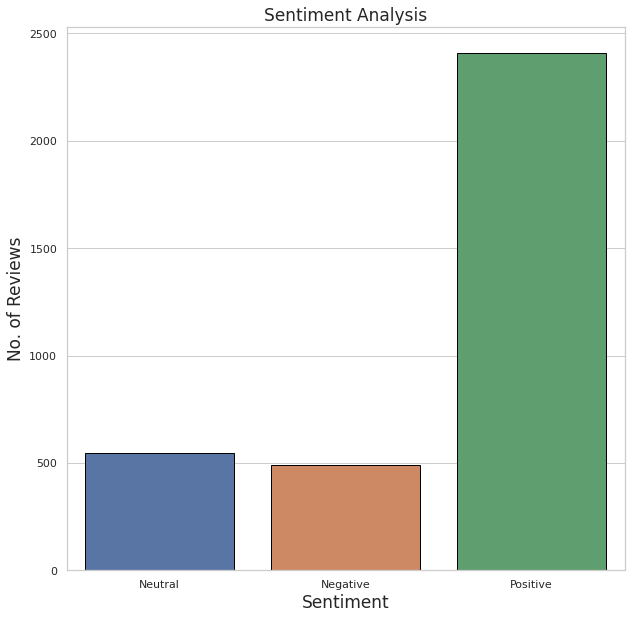

In [ ]:
from textblob import TextBlob

reviews_ = list()
df_r=df['Reviews']
for row in df_r:
    blob = TextBlob(row)
    reviews_.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_r = pd.DataFrame(reviews_, columns = ['sentence','sentiment','polarity'])
 
def f_title(df_r):
    if df_r['sentiment'] > 0:
        val = "Positive"
    elif df_r['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_r['Sentiment_Type'] = df_r.apply(f_title, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_r,edgecolor="Black")
ax.set_xlabel(xlabel="Sentiment",fontsize=17)
ax.set_ylabel(ylabel='No. of Reviews',fontsize=17)
ax.axes.set_title('Sentiment Analysis',fontsize=17)

In [ ]:
#  number of reviews per sentiment
sen_df = df['Sentiment'].value_counts().reset_index()
sen_df['% of reviews'] = sen_df['Sentiment'].map(lambda x : (x/sen_df['Sentiment'].sum())*100)
sen_df.style.background_gradient(cmap='summer_r')

,index,Sentiment,% of reviews
0,Positive,2411,69.924594
1,Neutral,545,15.806265
2,Negative,492,14.269142


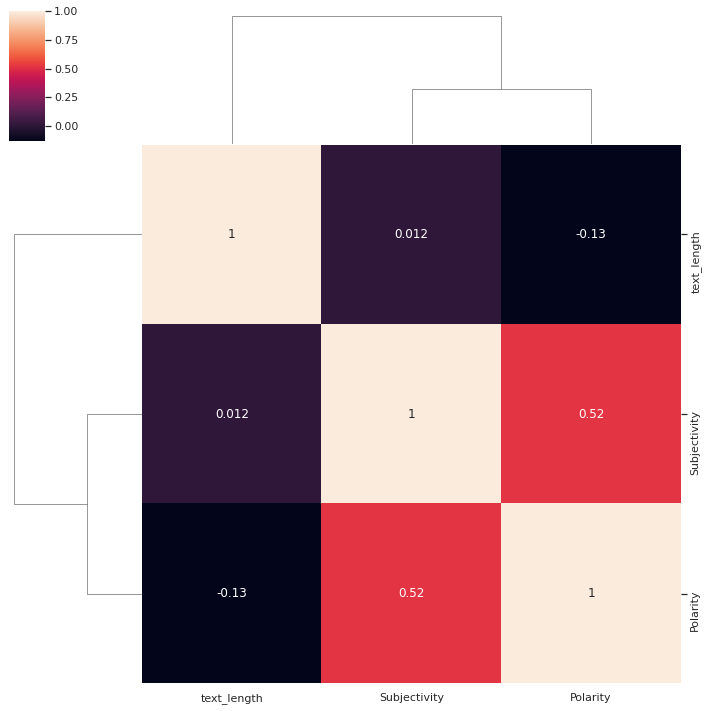

In [ ]:
# calculate the correlations
correlations = df.corr()
# plot the clustermap 
sns.clustermap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)

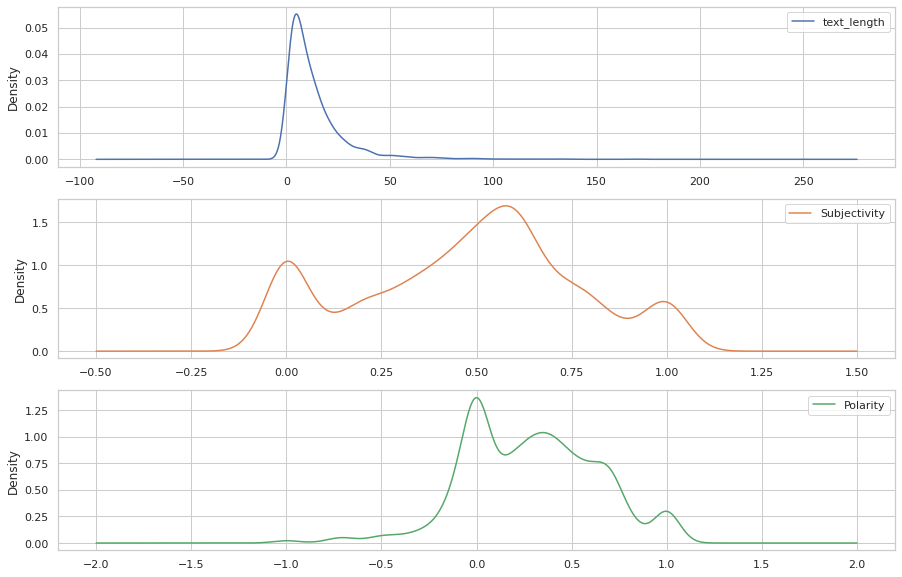

In [ ]:
df.plot(kind='density' , subplots=True, figsize=(15,10), sharex=False )
plt.show()

## `Pie-Chart`

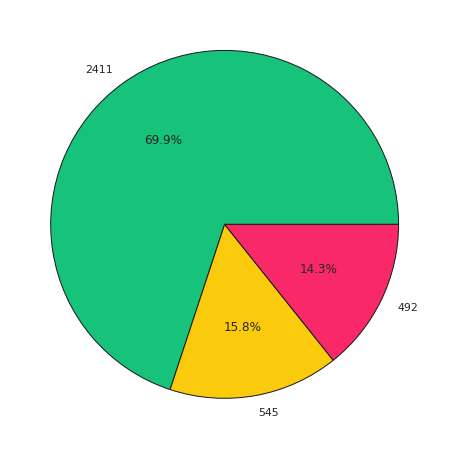

In [ ]:
fig=plt.figure(figsize=(10,8))
percent_class=sen_df.Sentiment
labels= sen_df.Sentiment
colors = ['#17C37B','#FACA0C','#F92969']
my_pie,_,_ = plt.pie(percent_class,radius = 1,labels=labels,colors=colors,autopct="%.1f%%")
plt.setp(my_pie, width=1, edgecolor='k') 
plt.show()

## `Generate a Word-Cloud`

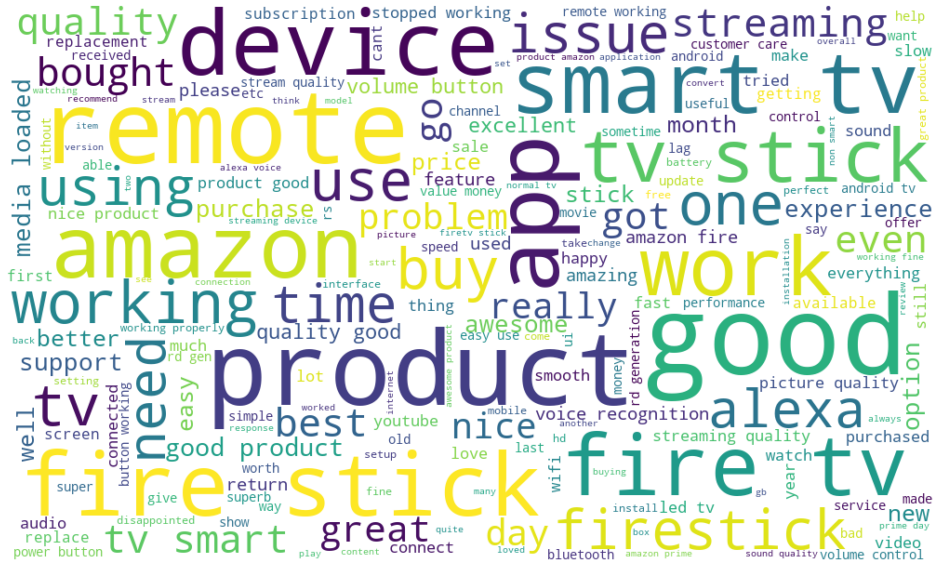

In [ ]:
allwords = " ".join([review for review in df["Reviews"]])
wc = WordCloud(background_color ='white',width = 1000, height = 600, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=60)
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

## `Word-Cloud for all Sentiment`

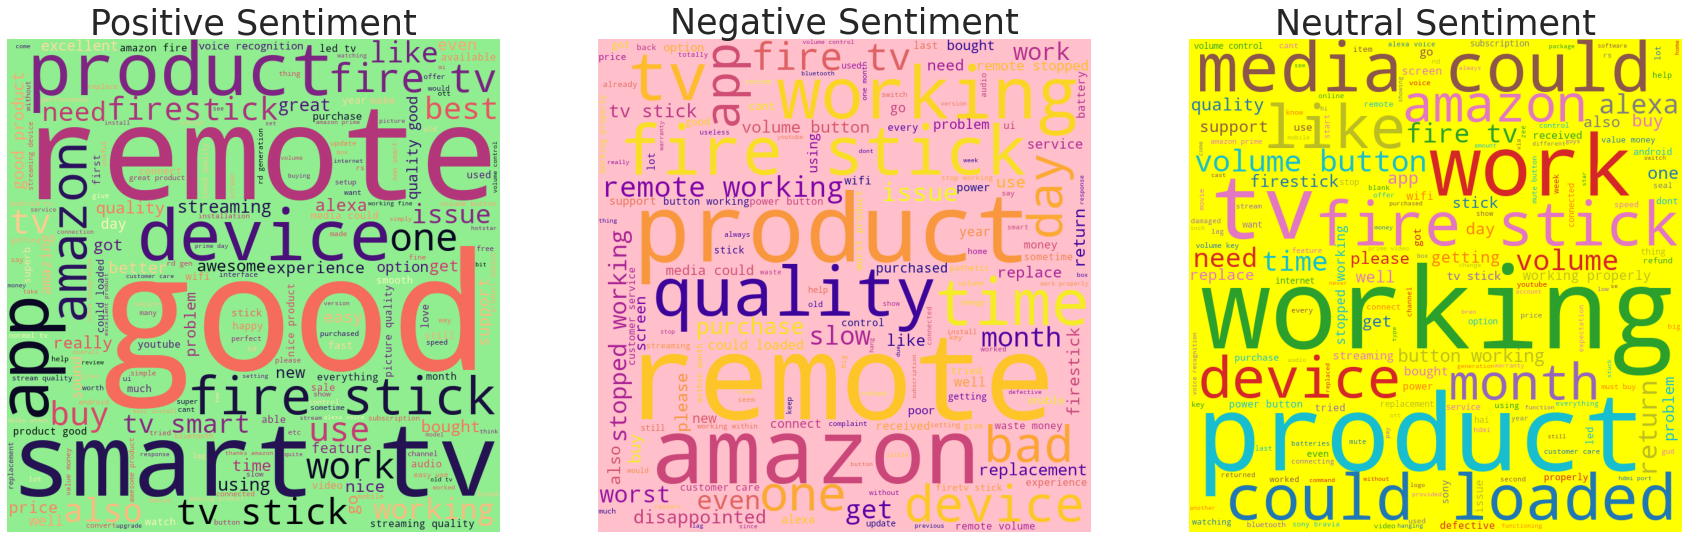

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])

df_pos = df[df["Sentiment"]=="Positive"]
df_neg = df[df["Sentiment"]=="Negative"]
df_neu = df[df["Sentiment"]=="Neutral"]

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df_pos.Reviews: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
   

wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='lightgreen',
                colormap="magma",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive Sentiment',fontsize=35);

comment_words = ''

for val in df_neg.Reviews: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "




wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='pink',
                colormap="plasma",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)  
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative Sentiment',fontsize=35);



comment_words = ''
for val in df_neu.Reviews: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud3 = WordCloud(width = 800, height = 800, 
                background_color ='yellow',
                colormap="tab10",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutral Sentiment',fontsize=35);

## `Using the n-gram tfidf vectorizer`
>## Term Frequency- Inverse Document Frequency

In [ ]:
df["Sentiment"]=df["Sentiment"].apply(lambda x: 1 if x=="Positive" else 0)
df['Reviews'] = df['Reviews'].astype(str)
df

all_text=df['Reviews']
train_text=df['Reviews']
y=df['Sentiment']

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)
train_features = hstack([train_char_features, train_word_features])

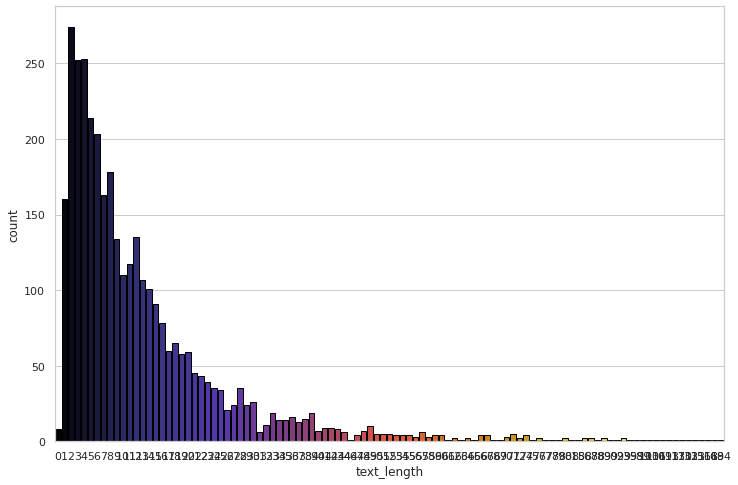

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x="text_length",data=df, palette="CMRmap",edgecolor="Black")

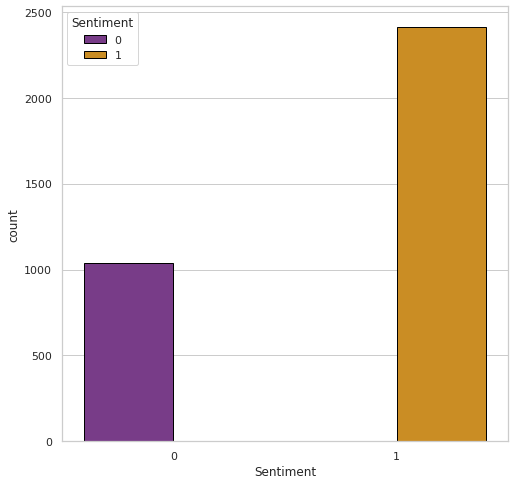

In [ ]:
fig=plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.countplot(x="Sentiment",hue="Sentiment",data=df, palette="CMRmap",edgecolor="Black")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_features, y,test_size=0.3,random_state=101,shuffle = True)
print(f"\n Input training data :{X_train.shape} \n Input test data :{X_test.shape}\n Output training data :{y_train.shape}\n Output test data : {y_test.shape}")


 Input training data :(2413, 55497) 
 Input test data :(1035, 55497)
 Output training data :(2413,)
 Output test data : (1035,)


## 1) `Support Vector Machine`

In [ ]:
from sklearn.svm import SVC
model_linear = SVC(kernel = "linear")
model_linear.fit(X_train,y_train)
pred_test_linear = model_linear.predict(X_test)
print("-"*40)
print("Kernel linear Accuracy:",metrics.accuracy_score(y_test, pred_test_linear)*100)

model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X_train,y_train)
pred_test_rbf = model_rbf.predict(X_test)
svm=metrics.accuracy_score(y_test, pred_test_rbf)*100
print("Kernel RBF Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf)*100)
print("-"*40)

----------------------------------------
Kernel linear Accuracy: 92.65700483091788
Kernel RBF Accuracy: 88.50241545893721
----------------------------------------


## 2) `Decision Tree Classifier`

In [ ]:
dtg = tree.DecisionTreeClassifier(criterion='gini')
kfold = KFold(n_splits=10)
# Creating the model on Training Data
DTree=dtg.fit(X_train,y_train)
prediction=DTree.predict(X_test)
res1 = cross_val_score(dtg, X_test, y_test,cv=kfold)

#print(metrics.confusion_matrix(y_test, prediction))
DT_train_accu=dtg.score(X_train, y_train)
print("-"*40)
print('Train Accuracy(Score) of the model', round(DT_train_accu,2)*100)
DT_test_accu=dtg.score(X_test, y_test)
print('Test Accuracy(Score) of the model', round(DT_test_accu,2)*100)
print('KFold Accuracy:',res1.mean()*100)
print("-"*40)

----------------------------------------
Train Accuracy(Score) of the model 100.0
Test Accuracy(Score) of the model 84.0
KFold Accuracy: 79.12994772218073
----------------------------------------


## 3) `KFold CrossValidation`

In [ ]:
kfold = KFold(n_splits=10)
model = LogisticRegression(max_iter=500)

results = cross_val_score(model, X_test, y_test, cv=kfold)
print("-"*40)
print("Accuracy:",results.mean()*100,"%")
print("-"*40)

----------------------------------------
Accuracy: 82.89301717699774 %
----------------------------------------


## 4) `Naive Bayes Model`

In [ ]:
X = df['Reviews']
y = df['Sentiment']
X_t, X_te, y_t, y_te = train_test_split(X, y,random_state = 42,
                                                   test_size = 0.25)
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),])

fit_model = clf.fit(X_t,y_t)
y_pred = clf.predict(X_te)
res = cross_val_score(clf, X_te, y_te,cv=kfold)
print("-"*40)
print('Training accuracy:', fit_model.score(X_t,y_t)*100)
print('Test accuracy:', fit_model.score(X_te,y_te)*100)
print('KFold Accuracy:',res.mean()*100)
print("-"*40)

----------------------------------------
Training accuracy: 84.72544470224285
Test accuracy: 78.07424593967517
KFold Accuracy: 74.47473937449878
----------------------------------------


## `5) Random Forest Model`

In [ ]:
rfc = RandomForestClassifier(n_jobs=4,oob_score=True,criterion='entropy',n_estimators=150)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
rf_acc=accuracy_score(y_pred,y_test)
results = cross_val_score(rfc, X_test, y_test, cv=kfold)
print("-"*40)
print('Training accuracy:', rfc.score(X_train,y_train)*100)
print('Test accuracy:', rfc.score(X_test,y_test)*100)
print('KFold Accuracy:',results.mean()*100)
print("-"*40)

----------------------------------------
Training accuracy: 100.0
Test accuracy: 87.53623188405797
KFold Accuracy: 83.56982823002241
----------------------------------------


## `6) XG Boost Model`

In [ ]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred)
results = cross_val_score(xgb, X_test, y_test,cv=kfold)

print("-"*40)
print('Training Accuracy:', xgb.score(X_train,y_train)*100)
print('Test Accuracy:', xgb.score(X_test,y_test)*100)
print('KFold Accuracy:',results.mean()*100)
print("-"*40)

----------------------------------------
Training Accuracy: 94.07376709490262
Test Accuracy: 88.50241545893721
KFold Accuracy: 82.3104929051531
----------------------------------------


## `7) RidgeClassifier Model`

In [ ]:
Ridg = RidgeClassifier()
Ridg.fit(X_train,y_train)
y_pred = Ridg.predict(X_test)
Ridg_acc = accuracy_score(y_test, y_pred)
results = cross_val_score(Ridg, X_test, y_test,cv=kfold)

print("-"*40)
print('Training Accuracy:', Ridg.score(X_train,y_train)*100)
print('Test Accuracy:', Ridg.score(X_test,y_test)*100)
print('KFold Accuracy:',results.mean()*100)
print("-"*40)

----------------------------------------
Training Accuracy: 99.95855781185247
Test Accuracy: 89.27536231884058
KFold Accuracy: 86.26773711725167
----------------------------------------


## `8) logistic regression model`

In [ ]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
log_acc = accuracy_score(y_test, y_pred)
results = cross_val_score(logreg, X_test, y_test,cv=kfold)

print("-"*40)
print('Training Accuracy:', logreg.score(X_train,y_train)*100)
print('Test Accuracy:', logreg.score(X_test,y_test)*100)
print('KFold Accuracy:',results.mean()*100)
print("-"*40)

----------------------------------------
Training Accuracy: 97.51346871114794
Test Accuracy: 89.7584541062802
KFold Accuracy: 82.89301717699774
----------------------------------------


## `9) Gradient Boosting Classifier`

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
gbc_acc = accuracy_score(y_test, y_pred)
results = cross_val_score(gbc, X_test, y_test,cv=kfold)

print("-"*40)
print('Training Accuracy:', gbc.score(X_train,y_train)*100)
print('Test Accuracy:', gbc.score(X_test,y_test)*100)
print('KFold Accuracy:',results.mean()*100)
print("-"*40)

----------------------------------------
Training Accuracy: 94.15665147119768
Test Accuracy: 87.14975845410629
KFold Accuracy: 81.44417475728154
----------------------------------------


## `10) Neural Network`

In [ ]:
X = df["Reviews"]
y = df.Sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
# using tokenizer to transform text messages into training and testing set
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_seq_padded = pad_sequences(X_train_seq, maxlen=64)
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=64)
X_train_seq_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 1331,  231,   19,   36,  376,   34,  284,  211,
          1,  525, 1331,  262, 1332, 1868,  321,    9,   48], dtype=int32)

- `Bidirectional LSTM`

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          291008    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              132000    
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                12864     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 435,937
Trainable params: 435,937
Non-trainable params: 0
_________________________________________________________________


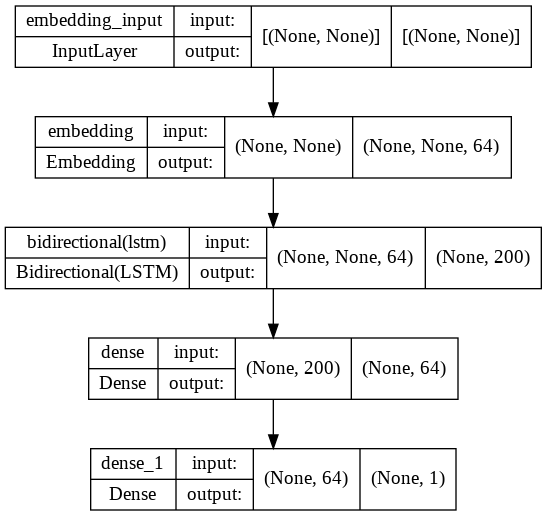

In [ ]:
# construct model
BATCH_SIZE = 32

model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1,64))
model.add(Bidirectional(LSTM(100, dropout=0,recurrent_dropout=0)))
model.add(Dense(64, activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile("adam","binary_crossentropy",metrics=["accuracy"])
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5,verbose=True)
history = model.fit(X_train_seq_padded, y_train,batch_size=BATCH_SIZE,epochs=15,
                    validation_data=(X_test_seq_padded, y_test),callbacks=[early_stop])

Epoch 1/15
81/81 [==============================] - 16s 138ms/step - loss: 0.5426 - accuracy: 0.7293 - val_loss: 0.3175 - val_accuracy: 0.8886
Epoch 2/15
81/81 [==============================] - 10s 120ms/step - loss: 0.2047 - accuracy: 0.9265 - val_loss: 0.2710 - val_accuracy: 0.9095
Epoch 3/15
81/81 [==============================] - 10s 118ms/step - loss: 0.0585 - accuracy: 0.9857 - val_loss: 0.2932 - val_accuracy: 0.9211
Epoch 4/15
81/81 [==============================] - 10s 119ms/step - loss: 0.0208 - accuracy: 0.9942 - val_loss: 0.3283 - val_accuracy: 0.9188
Epoch 5/15
81/81 [==============================] - 10s 119ms/step - loss: 0.0161 - accuracy: 0.9981 - val_loss: 0.3876 - val_accuracy: 0.9246
Epoch 6/15
81/81 [==============================] - 10s 119ms/step - loss: 0.0067 - accuracy: 0.9985 - val_loss: 0.3806 - val_accuracy: 0.9200
Epoch 7/15
81/81 [==============================] - 10s 120ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4050 - val_accuracy: 0.9246

In [ ]:
from sklearn.metrics import roc_auc_score
pred_train = model.predict(X_train_seq_padded)
pred_test = model.predict(X_test_seq_padded)
Dx= (roc_auc_score(y_test,pred_test)*100)
print("-"*50)
print('LSTM Neural Network Test Accuracy: ' + str(roc_auc_score(y_test, pred_test)*100))
print('LSTM Neural Network Train Accuracy: ' + str(roc_auc_score(y_train, pred_train)*100))
print("-"*50)

--------------------------------------------------
LSTM Neural Network Test Accuracy: 95.69701232583066
LSTM Neural Network Train Accuracy: 100.00000000000003
--------------------------------------------------


In [ ]:
model.evaluate(X_test_seq_padded, y_test)

27/27 [==============================] - 1s 27ms/step - loss: 0.4050 - accuracy: 0.9246


[0.4049988090991974, 0.924593985080719]

Text(0.5, 1.0, 'Training and Validation Accuracy')

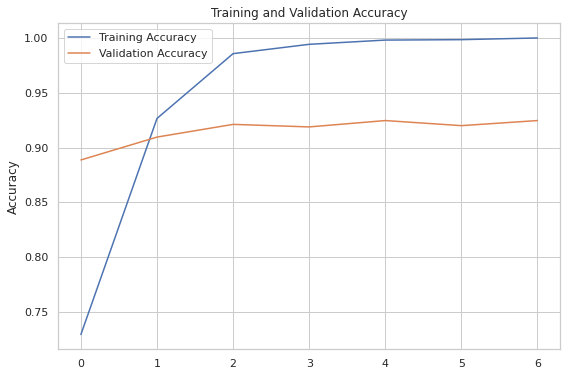

In [ ]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(9,6))
plt.plot(acc,label="Training Accuracy")
plt.plot(val_acc,label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Loss')

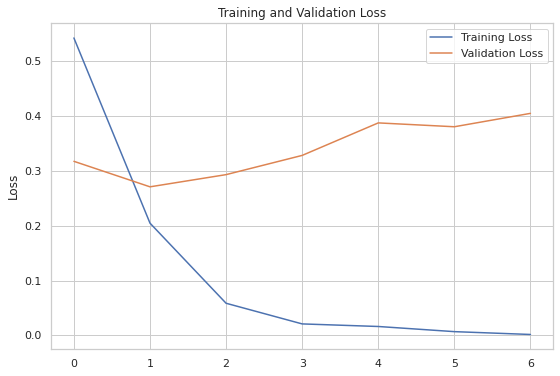

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(loss,label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.ylabel("Loss")
plt.title("Training and Validation Loss")

## `Accuracy Comparison`

In [ ]:
# initialize list of lists
data = [['Random Forest Classifier',rf_acc*100],['SVM',svm] ,['Decision Tree',(DT_test_accu)*100],['KFold CrossValidation',results.mean()*100],['XGboost Classifier', xgb_acc*100],['Naive Bayes Classiication',fit_model.score(X_t,y_t)*100],['Ridge Classifier',Ridg_acc*100],['Logistic Regression',log_acc*100],['Gradient Boosting Classifier',gbc_acc*100],['Neural Network',Dx]]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Model','Accuracy'])

# print dataframe.
df.sort_values(by='Accuracy',ascending=False, ignore_index=True)

,Model,Accuracy
0,Neural Network,95.697012
1,Logistic Regression,89.758454
2,Ridge Classifier,89.275362
3,SVM,88.502415
4,XGboost Classifier,88.502415
5,Random Forest Classifier,87.536232
6,Gradient Boosting Classifier,87.149758
7,Naive Bayes Classiication,84.725445
8,Decision Tree,83.574879
9,KFold CrossValidation,81.444175


# `File Dumping`

In [ ]:
import pickle as pi
p  = open("modelNB.pkl", "wb")
pi.dump(clf, p)
p.close()

### [<a href="#."> Back To Top</a>] 
# End